In [1]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [2]:
%%writefile app.py
import streamlit as st

x = st.slider('Select a value')
st.write(x, 'squared is', x * x)

Writing app.py


In [3]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
added 22 packages in 3s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦

In [4]:
!streamlit run /content/app.py &>/content/logs.txt &

In [5]:
!npx localtunnel --port 8501

⠙your url is: https://rich-wolves-boil.loca.lt
/content/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:22689 (check your firewall settings)
    at Socket.<anonymous> (/content/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0
⠙

In [1]:
!pip install inference

In [9]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://serverless.roboflow.com",
    api_key="D3Xlf1qhYUAr4LQ84DbN"
)

result = CLIENT.infer('/content/Screenshot 2025-05-06 153851.png', model_id="football-players-detection-3zvbc/11")


In [3]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 3.8 MB/s eta 0:00:00


In [54]:
def draw_small_labels(image, detections, labels, font_scale=0.5, thickness=1):
    for box, label in zip(detections.xyxy, labels):
        x1, y1, x2, y2 = map(int, box)
        # Position text above the box
        label_position = (x1, y1 - 5)

        # Draw rectangle background
        (text_w, text_h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
        cv2.rectangle(image, (x1, y1 - text_h - 10), (x1 + text_w, y1), (255, 0, 255), cv2.FILLED)

        # Draw label text
        cv2.putText(image, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), thickness)
    return image


In [11]:
import cv2
import supervision as sv
image = cv2.imread('/content/Screenshot 2025-05-06 153851.png')
detections = sv.Detections.from_inference(result)
#annotator = sv.BoxAnnotator()
#annotated_image = annotator.annotate(image, detections)
#cv2.imwrite('annotated_image.png', annotated_image)

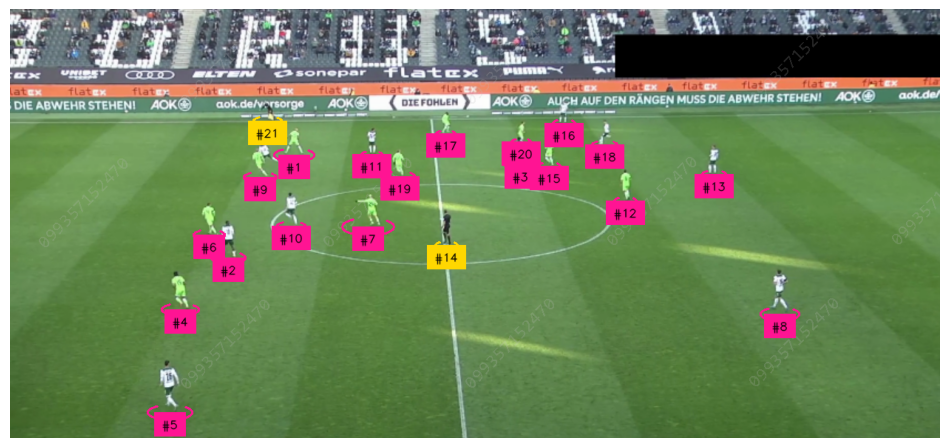

In [12]:
BALL_ID = 0

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
tracker = sv.ByteTrack()
tracker.reset()


ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)
all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1
all_detections = tracker.update_with_detections(detections=all_detections)
labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]


annotated_frame = image.copy()

annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections,
    labels=labels)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)


sv.plot_image(annotated_frame)


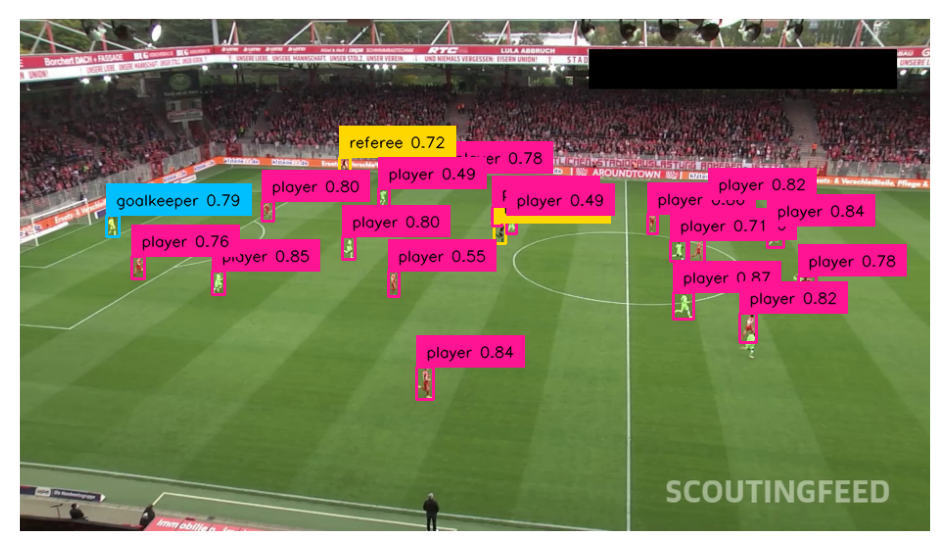

In [27]:
BALL_ID = 0
result = CLIENT.infer('/content/download.png', model_id="football-players-detection-3zvbc/10")
detections = sv.Detections.from_inference(result)
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)
all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1


annotated_frame = image

annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=labels)

sv.plot_image(annotated_frame)